建立一个逻辑回归模型判断学生是否有入学资格


#### 1.1 数据可视化

在对数据进行训练之前，最好是对数据有一些大概的了解

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
#导入数据
train_data =  pd.read_table('ex2data1.txt',sep=',',names=['exam1','exam2','res'])
train_data.head(5)

,exam1,exam2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


散点图的绘制方法，首先要把1和0分别提取出来，然后分别绘制

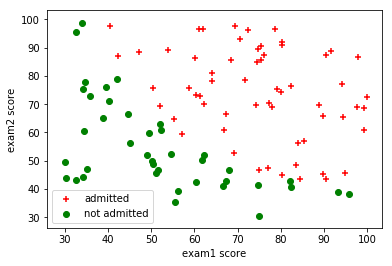

In [35]:
#散点图的绘制

posi = train_data[train_data['res']==1] #提取等于1的行
nega = train_data[train_data['res']==0] #提取等于0的行


plt.scatter(posi.exam1,posi.exam2,marker='+',color='red',label='admitted')
plt.scatter(nega.exam1,nega.exam2,marker='o',color='green',label='not admitted')

plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.legend()

#### 1.2.1 正则函数
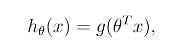
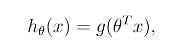

In [95]:
#定义正则函数
def sigmoid(z):
    
    g = 1./ (1 + np.exp(-z))
    return g


Text(0, 0.5, 'g(z)')

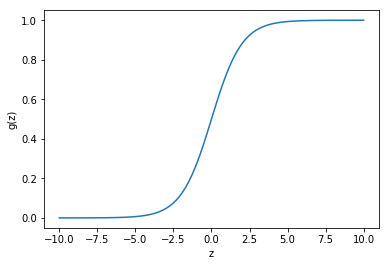

In [150]:
#可视化正则函数
z=np.linspace(-10,10,100)
plt.plot(z,sigmoid(z))
plt.xlabel('z')
plt.ylabel('g(z)')

#### 1.2.2代价函数与梯度
现在我们将代价函数与梯度应用到逻辑回归当中

注意：一定要明确各种参数的维度，不然很容易就出错了(没有迭代)

In [80]:
#定义梯度函数
def updateGrad(X,y,theta):
    
    z = np.dot(X,theta) # m*3 与 3*1 得到（m*1）
    h = sigmoid(z)    
    grad = 1./m *(np.dot(X.T,(h-y)))
        
    return grad

In [177]:

#返回代价函数
def cost_function(theta, X, y):
    m = y.size
    #theta.shape=(n*1)
    
    # X.shape=m*3     y.shape=m*1,      theta.shape=3*1
    #theta = theta.reshape(theta[0],1)
    
    z = np.dot(X,theta) # 100*3 与 3*1 得到（100*1）
    h = sigmoid(z)      #（100*1）
    cost_sum = np.sum(-np.multiply(y,np.log(h))-np.multiply((1 - y),np.log(1-h)))
    cost = (1/m)*cost_sum

    
    return cost_sum,cost

In [178]:
#train_data.insert(0,'ones',1)
train_data.head()

,ones,exam1,exam2,res
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [191]:
theta = np.zeros((3))
X = train_data[['ones','exam1','exam2']]
y = train_data['res']
z = np.dot(X,theta)
X.shape,y.shape,theta.shape

#np.multiply((1 - y),np.log(1-h))

((100, 3), (100,), (3,))

 在进行计算时要把数据转换成数组或者矩阵进行计算

In [190]:
X = np.array(X)
y = np.array(y)
theta = np.zeros((3))
h = sigmoid(np.dot(X,theta)) 
y.size




100

In [186]:
cost_function(theta, X, y)

(69.31471805599453, 0.6931471805599453)

#### 1.2.4 预测逻辑回归值